
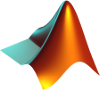
# **MatrixLaboratory $\Rightarrow$ Matlab**
is an interpreted programming language. Originally developed for linear algebra and engineering problems, but now with wide applicability and toolboxes for areas ranging from medicine, economics, and machine learning.

A good way to introduce yourself to a new language is by trying to solve a "non-trivial" problem; learning the tools and syntax necessary to solve the problem along the way. This motivates the syntax/tools in a "why" versus "what" way!

help@scc.bu.edu

jbevan@bu.edu

bgregor@bu.edu

In [ ]:
format compact

# Motivation: An Exploration of an Interesting Dataset


<img src="life.PNG" width="800">


**Github repository of data we will use**

https://github.com/bu-rcs/bu-rcs.github.io/tree/main/Bootcamp/Data

**Citation**

University of Wisconsin Population Health Institute. County Health Rankings & Roadmaps 2019.www.countyhealthrankings.org.

**Data Source**

https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation

# The readtable() solution

x_FairOrPoorHealth    x_Smokers    x_AdultsWithObesity    x_PhysicallyInactive    x_WithAccessToExerciseOpportunities    x_ExcessiveDrinking    x_SomeCollege    x_ChildrenInPoverty    x_SevereHousingProblems    x_DriveAloneToWork    x_LongCommute_DrivesAlone

In [174]:
T = readtable("NE_HealthData.csv");
states=unique(T.State);
state_inds=cellfun(@(c)strcmp(c,T.State),states,'UniformOutput',false);
mymap = containers.Map(states,state_inds);
T(mymap("Connecticut"),{'FIPS','County','x_Smokers'});
Tnum = table2array(T(:,[4:9,11:15]));
colmap = containers.Map(1:11,[4:9,11:15]);

Set 'PreserveVariableNames' to true to use the original column headers as table variable names.


Examples of using our data:

In [ ]:
averages = zeros(numel(states),11);
it = 1;
for state = 1:6
    averages(it,:) = mean(table2array(T(mymap(states{state}),[4:9,11:15])));
    it = it + 1;
end

In [ ]:
T.County(T.x_ChildrenInPoverty>10);

https://www.mathworks.com/matlabcentral/answers/64559-how-do-i-extract-a-vector-of-results-from-a-map

# Plotting and Visualization

Some examples:

**Correlation Plots**

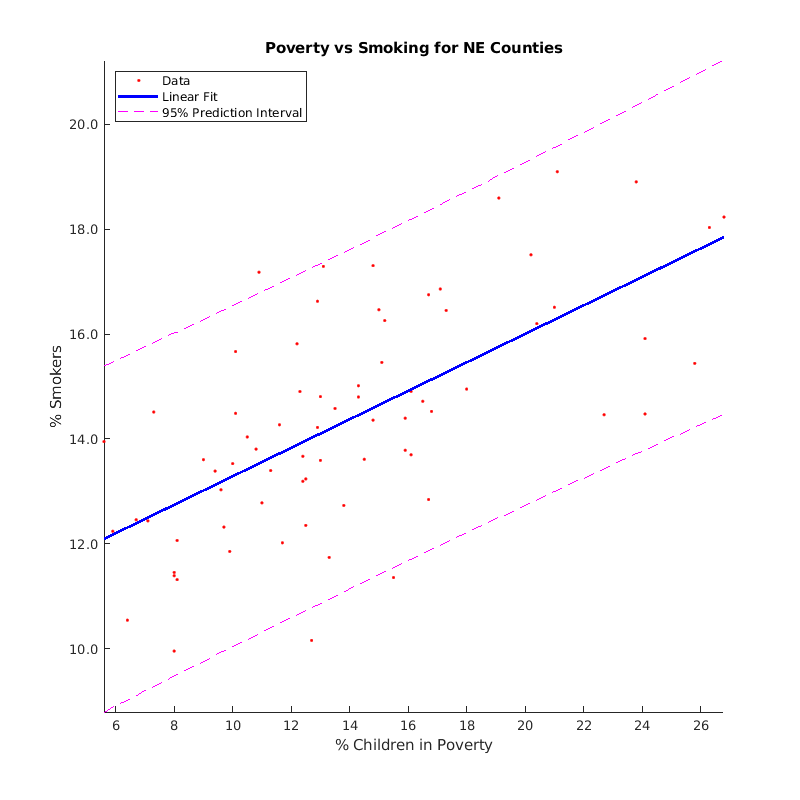

In [175]:
%plot inline -s 800,800
myscatter = scatter(T.x_ChildrenInPoverty, T.x_Smokers,'.r');
title("Poverty vs Smoking for NE Counties")
xlabel('% Children in Poverty')
ylabel('% Smokers')
ax = ancestor(myscatter,'axes');
ax.YAxis.Exponent=0;
ytickformat('%2.1f')
axis tight
hold on

%Plot linear regression and 95% confidence interval
[coeff, S] = polyfit(T.x_ChildrenInPoverty, T.x_Smokers,1);
xFit = linspace(min(T.x_ChildrenInPoverty), max(T.x_ChildrenInPoverty), 100);
[yFit, delta] = polyval(coeff, xFit, S);
plot(xFit, yFit, 'b-', 'LineWidth', 2);
plot(xFit,yFit+2*delta,'m--',xFit,yFit-2*delta,'m--')
legend('Data','Linear Fit','95% Prediction Interval','Location','northwest')

**Crude Geographic Plots**

*Census Data Source*:  
https://www.census.gov/geographies/reference-files/time-series/geo/gazetteer-files.html

*Direct link:*  
https://www2.census.gov/geo/docs/maps-data/data/gazetteer/2019_Gazetteer/2019_Gaz_counties_national.zip

In [ ]:
C=readtable('counties.txt');
lat = C.INTPTLAT;
long = C.INTPTLONG;

In [ ]:
%plot -s 800,400
contig = long>-125 & long<-50 & lat>24;
clong = long(contig);
clat = lat(contig);
scatter(clong,clat,[],rand(numel(clong),1)*20+clong,'*')
axis tight equal

In [ ]:
%plot inline
dt = delaunayTriangulation(clong,clat);
tri = dt.ConnectivityList;

xy = [clong, clat];
maxEdge = 2.6;
edges = [tri(:,[1 2]);tri(:,[1 3]);tri(:,[2 3])];
tri(any(reshape(sqrt((xy(edges(:,1),1) - xy(edges(:,2),1)).^2 + (xy(edges(:,1),2) - xy(edges(:,2),2)).^2),[],3) > maxEdge,2),:) = [];

figure
h = trisurf(tri,clong,clat,rand(numel(clong),1)*20+clong);
set(h,'edgecolor','none')
%shading interp
view(2)
axis tight

# Time-series Data Example

Source data:  
https://github.com/nytimes/covid-19-data

Direct link:  
https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv

In [ ]:
% Read-in data file
T=readtable("us-states.csv");
% Format contents how we want
cases = table2array(T(:,4));

date = table2array(T(:,1));
elapsed = days(date - date(1));

states = table2array(T(:,2));
unique_states = unique(states);
mymap = containers.Map(unique_states,1:55);
state_nums=cell2mat(mymap.values(states));

% Pre-allocate "infection" and "day" matrices
infection = zeros(numel(unique_states), elapsed(end)+1);
day = infection;
% Pre-allocate "state_counter" to be 1 for all states
state_counter = ones(1,numel(unique_states));
% Loop through formatted data
for record = 1:numel(cases)
%    For next record, get correct row=state and column=state_counter(state)
    row = state_nums(record);
    column = state_counter(row);
    state_counter(row) = state_counter(row) + 1;
%    Put # infections in infection(row,column)
    infection(row,column) = cases(record);
    day(row,column) = elapsed(record);
%    Put day in day(row,column)   
end
% Find first day where infection>100, use this as starting day in plot
% Plot data for all states, starting from selected day

In [ ]:
%plot inline -s 700,500
[vals,inds] = sort(max(infection'));
inds=inds(10000<vals & vals<700000);
for i = numel(inds):-5:1
    want = infection(inds(i),:)>100;
    h = plot(infection(inds(i), want));
    hold on
end

title("I")
xlabel('Relative Day')
ylabel('Infections')
legend(unique_states(inds(numel(inds):-5:1)),'Location','northwest')
ax = ancestor(h,'axes');
ax.YAxis.Exponent=0;
ytickformat('%2.1f')
axis tight

# Statistical Tools <a name='stats_tasks' />
*Let's try to do some of the following:*

-Correlation analysis.  Which columns are dependent on other columns?  
Fit some linear models to correlated columns.  What's the quality of the fit? P-value?  
-<a href=#normal>Take the age expectancy histogram.  Fit a Gaussian distribution to it. What's the quality of the fit?</a>    
-Compare different groups in the data set; Urban vs. Rural - distribution of men vs women, life expectancy, % smokers etc.  
Are the differences statistically significant?  Are they significant in a real sense?  
-<a href=#Zipf>Zipf's law:  create a histogram of county population size.</a>   

**Correlation analysis:**
<a name='corrs' />

In [181]:
R

R =
  Columns 1 through 7
    1.0000    0.6674    0.5377    0.7128   -0.1838   -0.2379   -0.4652
    0.6674    1.0000    0.7640    0.6703   -0.6236   -0.2537   -0.6423
    0.5377    0.7640    1.0000    0.7996   -0.5223   -0.4890   -0.6329
    0.7128    0.6703    0.7996    1.0000   -0.3453   -0.4221   -0.5920
   -0.1838   -0.6236   -0.5223   -0.3453    1.0000    0.2657    0.6454
   -0.2379   -0.2537   -0.4890   -0.4221    0.2657    1.0000    0.5344
   -0.4652   -0.6423   -0.6329   -0.5920    0.6454    0.5344    1.0000
    0.7692    0.6548    0.5373    0.5694   -0.4881   -0.3641   -0.7600
    0.1594   -0.1909   -0.3385   -0.1968    0.3659    0.2844    0.0777
   -0.0897    0.1345    0.4384    0.3305   -0.1012   -0.4509   -0.2083
   -0.0984   -0.1525   -0.1224    0.0249    0.0293    0.2401    0.2296
  Columns 8 through 11
    0.7692    0.1594   -0.0897   -0.0984
    0.6548   -0.1909    0.1345   -0.1525
    0.5373   -0.3385    0.4384   -0.1224
    0.5694   -0.1968    0.3305    0.0249
   -0.

ans =
    '   0  67  54  71 -18 -24 -47  77  16  -9 -10
        0   0  76  67 -62 -25 -64  65 -19  13 -15
        0   0   0  80 -52 -49 -63  54 -34  44 -12
        0   0   0   0 -35 -42 -59  57 -20  33   2
        0   0   0   0   0  27  65 -49  37 -10   3
        0   0   0   0   0   0  53 -36  28 -45  24
        0   0   0   0   0   0   0 -76   8 -21  23
        0   0   0   0   0   0   0   0   8 -13 -16
        0   0   0   0   0   0   0   0   0 -52 -21
        0   0   0   0   0   0   0   0   0   0  -7
        0   0   0   0   0   0   0   0   0   0   0
     '


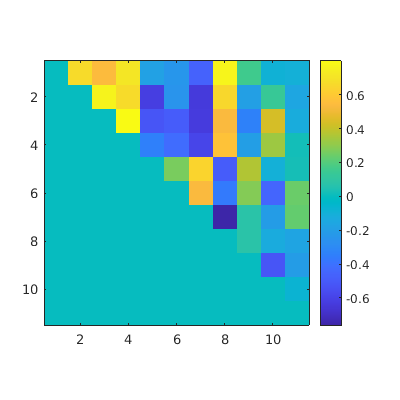

In [209]:
%plot inline -s 400,400
[R, P] = corrcoef(Tnum);
sprintf([repmat('%4.0f',1,size(R,2)) '\n'], triu(R,1)'*100)

colormap(parula);
imagesc(triu(R,1))
axis square
colorbar

In [194]:
max(abs(-1000:5))

ans =
        1000


In [182]:
T(1,[colmap(4),colmap(5),colmap(11)])

ans =
  1x3 table
    x_PhysicallyInactive    x_WithAccessToExerciseOpportunities    x_LongCommute_DrivesAlone
    ____________________    ___________________________________    _________________________
            20.4                          94.019                             33.7           


In [197]:
[r,c] = find(abs(triu(R,1))==max(abs(R-eye(size(R))),[],'all'))

r =
     3
c =
     4


In [198]:
T(1,[colmap(3),colmap(4)])

ans =
  1x2 table
    x_AdultsWithObesity    x_PhysicallyInactive
    ___________________    ____________________
           25.8                    20.4        


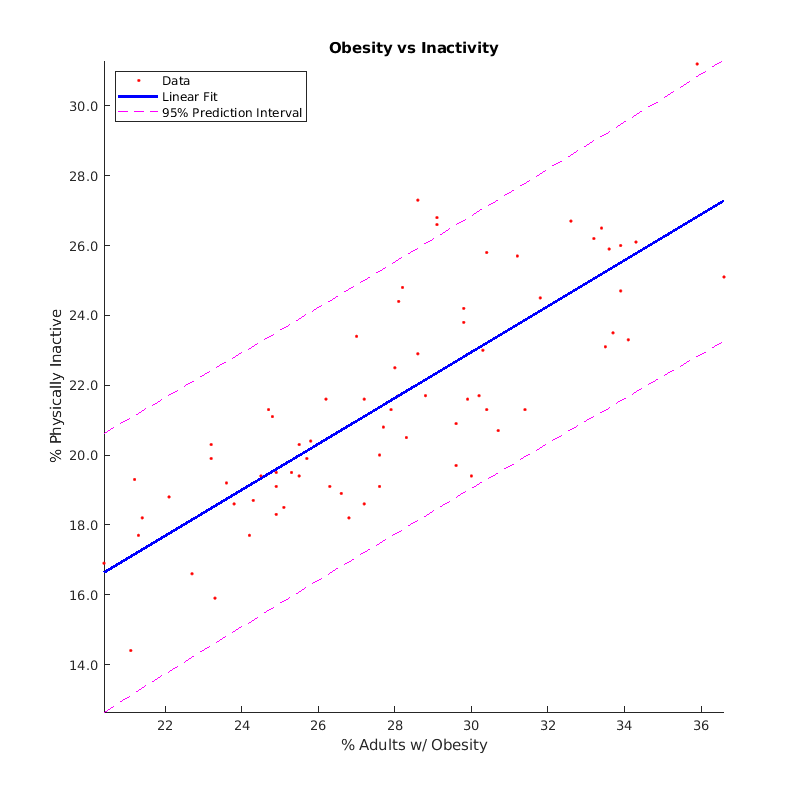

In [199]:
%plot inline -s 800,800
myscatter = scatter(T.x_AdultsWithObesity, T.x_PhysicallyInactive,'.r');
title("Obesity vs Inactivity")
xlabel('% Adults w/ Obesity')
ylabel('% Physically Inactive')
ax = ancestor(myscatter,'axes');
ax.YAxis.Exponent=0;
ytickformat('%2.1f')
axis tight
hold on

%Plot linear regression and 95% confidence interval
[coeff, S] = polyfit(T.x_AdultsWithObesity, T.x_PhysicallyInactive,1);
xFit = linspace(min(T.x_AdultsWithObesity), max(T.x_AdultsWithObesity), 100);
[yFit, delta] = polyval(coeff, xFit, S);
plot(xFit, yFit, 'b-', 'LineWidth', 2);
plot(xFit,yFit+2*delta,'m--',xFit,yFit-2*delta,'m--')
legend('Data','Linear Fit','95% Prediction Interval','Location','northwest')

In [237]:
[R, P1] = corrcoef(Tnum,'Alpha',0.05);
[R, P2] = corrcoef(Tnum,'Alpha',0.001);

In [234]:
sprintf([repmat('%6.0f',1,size(taco,2)) '\n'], triu(taco,1)'*10000)

ans =
    '     0     0     0     0  1195   426     0     0  1781  4507  4074
          0     0     0     0     0   303     0     0  1057  2564  1979
          0     0     0     0     0     0     0     0    34     1  3023
          0     0     0     0    28     2     0     0   952    43  8341
          0     0     0     0     0   231     0     0    15  3944  8055
          0     0     0     0     0     0     0    15   148     1   407
          0     0     0     0     0     0     0     0  5134   770   507
          0     0     0     0     0     0     0     0  5163  2746  1651
          0     0     0     0     0     0     0     0     0     0   782
          0     0     0     0     0     0     0     0     0     0  5395
          0     0     0     0     0     0     0     0     0     0     0
     '


In [235]:
P(3,4)-0

ans =
   2.2221e-17


**Testing for Normal Distribution:**

Remember our next <a href=#stats_tasks>goal:</a>
<a name='normal' />

FIPS       State       County     LifeExpectancy     x_FrequentPhysicalDistress    x_LimitedAccessToHealthyFoods    MedianHouseholdIncome    x_Homeowners    x_SevereHousingCostBurden    Population     x_Black      x_AmericanIndian_AlaskaNative    x_Asian    x_NativeHawaiian_OtherPacificIslander    x_Hispanic    x_Non_HispanicWhite    x_Female      x_Rural

In [240]:
USAd = readtable("USA_DemographicsData.csv");
USAd(1:8,1:5)

Set 'PreserveVariableNames' to true to use the original column headers as table variable names.
ans =
  8x5 table
    FIPS       State         County        LifeExpectancy     x_FrequentPhysicalDistress
    ____    ___________    ___________    ________________    __________________________
    1000    {'Alabama'}    {'NA'     }    {'75.416194148'}              15.827          
    1001    {'Alabama'}    {'Autauga'}    {'76.879477172'}              13.685          
    1003    {'Alabama'}    {'Baldwin'}    {'78.450258368'}               12.48          
    1005    {'Alabama'}    {'Barbour'}    {'75.34193493' }              17.185          
    1007    {'Alabama'}    {'Bibb'   }    {'73.571820279'}              13.627          
    1009    {'Alabama'}    {'Blount' }    {'74.145825897'}              14.523          
    1011    {'Alabama'}    {'Bullock'}    {'73.530894789'}              16.881          
    1013    {'Alabama'}    {'Butler' }    {'72.918309203'}              16.697       

In [241]:
USAd(72:78,1:4)

ans =
  7x4 table
    FIPS      State                County              LifeExpectancy 
    ____    __________    ________________________    ________________
    2020    {'Alaska'}    {'Anchorage'           }    {'79.313560574'}
    2050    {'Alaska'}    {'Bethel'              }    {'72.087654272'}
    2060    {'Alaska'}    {'Bristol Bay'         }    {'NA'          }
    2068    {'Alaska'}    {'Denali'              }    {'77.693420522'}
    2070    {'Alaska'}    {'Dillingham'          }    {'73.562821554'}
    2090    {'Alaska'}    {'Fairbanks North Star'}    {'79.662175255'}
    2100    {'Alaska'}    {'Haines'              }    {'84.794838504'}


Can't keep avoiding our problem now:  
https://www.mathworks.com/help/matlab/matlab_prog/clean-messy-and-missing-data-in-tables.html

In [331]:
USAd = readtable("USA_DemographicsData.csv",'TreatAsEmpty',{'NA'});
USAd(72:78,1:4)

Set 'PreserveVariableNames' to true to use the original column headers as table variable names.
ans =
  7x4 table
    FIPS      State                County             LifeExpectancy
    ____    __________    ________________________    ______________
    2020    {'Alaska'}    {'Anchorage'           }        79.314    
    2050    {'Alaska'}    {'Bethel'              }        72.088    
    2060    {'Alaska'}    {'Bristol Bay'         }           NaN    
    2068    {'Alaska'}    {'Denali'              }        77.693    
    2070    {'Alaska'}    {'Dillingham'          }        73.563    
    2090    {'Alaska'}    {'Fairbanks North Star'}        79.662    
    2100    {'Alaska'}    {'Haines'              }        84.795    


We also should remove the 'NA' counties that are actually just state averages (how does this affect correlation from above?):

In [243]:
USAd(1:8,1:5)

ans =
  8x5 table
    FIPS       State         County       LifeExpectancy    x_FrequentPhysicalDistress
    ____    ___________    ___________    ______________    __________________________
    1000    {'Alabama'}    {'NA'     }        75.416                  15.827          
    1001    {'Alabama'}    {'Autauga'}        76.879                  13.685          
    1003    {'Alabama'}    {'Baldwin'}         78.45                   12.48          
    1005    {'Alabama'}    {'Barbour'}        75.342                  17.185          
    1007    {'Alabama'}    {'Bibb'   }        73.572                  13.627          
    1009    {'Alabama'}    {'Blount' }        74.146                  14.523          
    1011    {'Alabama'}    {'Bullock'}        73.531                  16.881          
    1013    {'Alabama'}    {'Butler' }        72.918                  16.697          


In [332]:
size(USAd)
USAd(strcmp('NA',USAd.County),:)=[];
size(USAd)

ans =
        3193          18
ans =
        3142          18


In [319]:
regionlist={"Alabama","Tennessee","Mississippi","Kentucky"};
region_ind=zeros(numel(USAd.County),1);
for i=1:numel(regionlist)
    region_ind = region_ind | USAdmap(regionlist{i});
end

In [337]:
states=unique(USAd.State);
state_inds=cellfun(@(c)strcmp(c,USAd.State),states,'UniformOutput',false);
USAdmap = containers.Map(states,state_inds);
USAd(1:8,1:5)
USAdnum = table2array(USAd(:,4:18));
USAdcolmap = containers.Map(1:15,4:18);

ans =
  8x5 table
    FIPS       State         County       LifeExpectancy    x_FrequentPhysicalDistress
    ____    ___________    ___________    ______________    __________________________
    1001    {'Alabama'}    {'Autauga'}        76.879                  13.685          
    1003    {'Alabama'}    {'Baldwin'}         78.45                   12.48          
    1005    {'Alabama'}    {'Barbour'}        75.342                  17.185          
    1007    {'Alabama'}    {'Bibb'   }        73.572                  13.627          
    1009    {'Alabama'}    {'Blount' }        74.146                  14.523          
    1011    {'Alabama'}    {'Bullock'}        73.531                  16.881          
    1013    {'Alabama'}    {'Butler' }        72.918                  16.697          
    1015    {'Alabama'}    {'Calhoun'}        73.039                  14.754          


In [248]:
median(USAd.LifeExpectancy)

ans =
   NaN


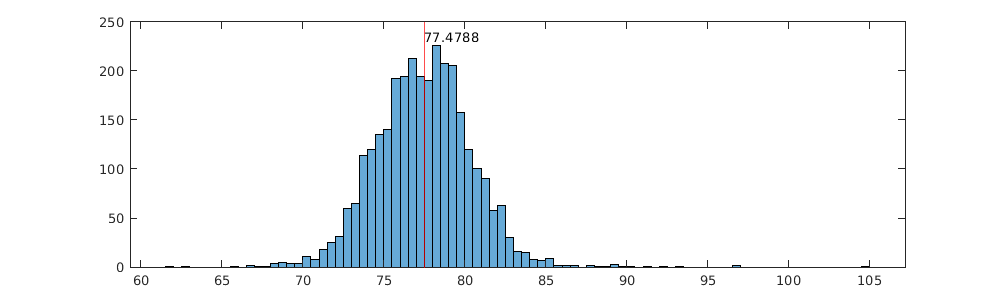

In [338]:
%plot inline -s 1000,300
histogram(USAd.LifeExpectancy)
med = median(USAd.LifeExpectancy,'omitnan');
xline(med,'r');
text(med,235,num2str(med))

How do we go about fitting a normal to this?  
Let's take a look at MathWorks documentation to see and then test if this is a good fit.  
(Good illustration of my process and how to solve open-ended problems)

In [339]:
le = USAd.LifeExpectancy(region_ind);
pd = fitdist(le,'Normal')

pd = 
  NormalDistribution

  Normal distribution
       mu = 74.5224   [74.3178, 74.727]
    sigma = 1.98197   [1.84752, 2.13769]



In [322]:
tot = sum(le,'omitnan');
[N,edges] = histcounts(le);
Nnorm = N/sum(N);
size(edges);
size(N);

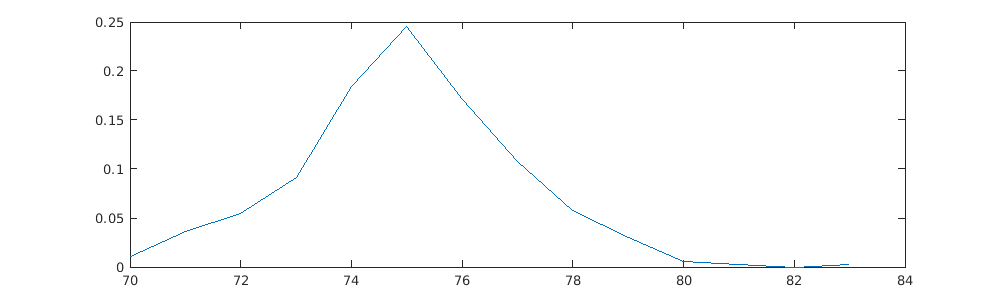

In [323]:
plot(diff(edges)+edges(1:end-1),Nnorm)

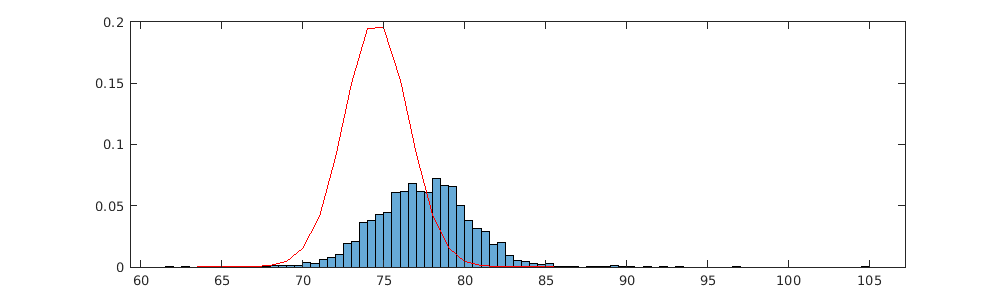

In [330]:
%plot inline -s 1000,300
x_values = 60:105;
y = pdf(pd,x_values);
%plot(diff(edges)+edges(1:end-1),Nnorm)
histogram(USAd.LifeExpectancy,'Normalization', 'probability')
hold on
plot(x_values,y,'r')


In [278]:
negloglik(pd)

ans =
   7.7651e+03


In [329]:
rng default;  % for reproducibility
x = random(pd,100,1);

[h, p] = chi2gof(x,'Alpha',0.05)

h =
     0
p =
    0.3775


In [295]:
NEd = readtable("NE_DemographicsData.csv",'TreatAsEmpty',{'NA'});

states=unique(USA.State);
state_inds=cellfun(@(c)strcmp(c,NEd.State),states,'UniformOutput',false);
NEdmap = containers.Map(states,state_inds);
NEdnum = table2array(NEd(:,4:18));
NEdcolmap = containers.Map(1:15,4:18);
size(NEd)
NEd(strcmp('NA',NEd.County),:)=[];
size(NEd)

Set 'PreserveVariableNames' to true to use the original column headers as table variable names.
ans =
    73    18
ans =
    67    18


In [312]:
le = NEd.LifeExpectancy;
pd = fitdist(le,'Normal')

pd = 
  NormalDistribution

  Normal distribution
       mu = 79.5001   [79.1212, 79.8791]
    sigma =  1.5537   [1.32793, 1.87266]



In [302]:
tot = sum(le,'omitnan');
[N,edges] = histcounts(le);
Nnorm = N/sum(N);
size(edges);
size(N);

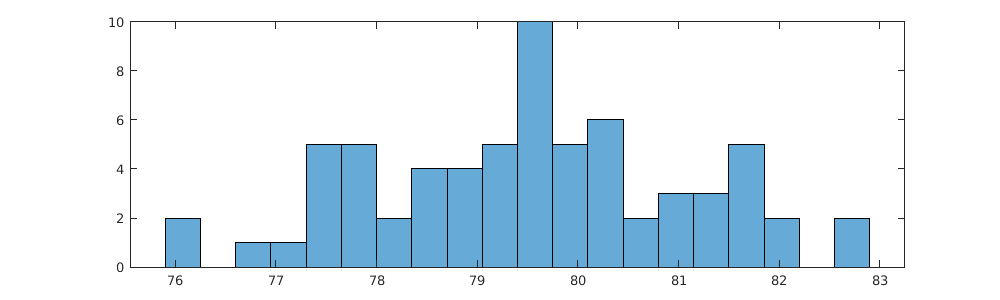

In [309]:
%plot inline -s 1000,300
x_values = 60:105;
y = pdf(pd,x_values);
%plot(diff(edges)+edges(1:end-1),Nnorm)
histogram(NEd.LifeExpectancy,20)
hold on
%plot(x_values,y,'r')

In [313]:
rng default;  % for reproducibility
x = random(pd,100,1);

[h, p] = chi2gof(x,'Alpha',0.05)

h =
     0
p =
    0.3775


**Zipf's Law:**

https://en.wikipedia.org/wiki/Zipf%27s_law

<a href=#stats_tasks>Remember our goal:</a>  
Order and rank county populations.  Plot rank vs. population size on a log-log plot.  Except for the smallest sizes they will fit a straight line. How should we go about fitting?
<a name='Zipf' />